In [1]:
#import important liabrary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns', None)

In [2]:
#loading dataset
data=pd.read_csv(r"D:\new flight price prediction.csv")
data

airlines_name source_name destination_name departure_time arrival_time  \
0         SpiceJet         VNS              DEL          19:20        21:10   
1         SpiceJet         VNS              DEL          19:20        21:10   
2         GO FIRST         VNS              DEL           7:10         8:30   
3         GO FIRST         VNS              DEL          17:00        18:25   
4         GO FIRST         VNS              DEL           7:10         8:30   
...            ...         ...              ...            ...          ...   
1522     Air India         VNS              BOM          13:20        15:40   
1523     Air India         VNS              BOM          13:20        15:40   
1524     Air India         VNS              BOM          13:20        15:40   
1525     Air India         VNS              BOM          13:20        15:40   
1526     Air India         VNS              BOM          13:20        15:40   

        duration  stoppage travel_date  price_flight  
0        1:50:00  Non Stop  23/11/2021          5430  
1        1:50:00  Non Stop  23/11/2021          5430  
2        1:20:00  Non Stop  23/11/2021          5432  
3        1:25:00  Non Stop  23/11/2021          5432  
4        1:20:00  Non Stop  23/11/2021          5432  
...          ...       ...         ...           ...  
1522  1.07:05:00   2 Stops  30/12/2021          9103  
1523     9:45:00   2 Stops  30/12/2021          9838  
1524    14:20:00   2 Stops  30/12/2021         13443  
1525    14:20:00   2 Stops  30/12/2021         14031  
1526    10:45:00   2 Stops  30/12/2021         14545  

[1527 rows x 9 columns]

In [3]:
data.shape

(1527, 9)

In [4]:
#checking what type of data contains in dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1527 entries, 0 to 1526
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   airlines_name     1527 non-null   object
 1   source_name       1527 non-null   object
 2   destination_name  1527 non-null   object
 3   departure_time    1527 non-null   object
 4   arrival_time      1527 non-null   object
 5   duration          1527 non-null   object
 6   stoppage          1527 non-null   object
 7   travel_date       1527 non-null   object
 8   price_flight      1527 non-null   int64 
dtypes: int64(1), object(8)
memory usage: 107.5+ KB


In [5]:
# to check null values in dataset
data.isnull().sum()

airlines_name       0
source_name         0
destination_name    0
departure_time      0
arrival_time        0
duration            0
stoppage            0
travel_date         0
price_flight        0
dtype: int64

In [6]:
# checking unique values of airlines_name column
data['airlines_name'].unique()

array(['SpiceJet', 'GO FIRST', 'Indigo', 'Vistara', 'Air India'],
      dtype=object)

In [7]:
# converting of categorical column into numerical form
data['airlines_name']=data['airlines_name'].replace({'SpiceJet':1,'GO FIRST':2,'Indigo':3,'Vistara':4,'Air India':5})

In [8]:
# converting of categorical column into numerical form
data['source_name']=data['source_name'].replace({'VNS':0})

In [9]:
data['destination_name'].unique()

array(['DEL', 'BLR', 'BOM', 'AMD'], dtype=object)

In [10]:
# converting of categorical column into numerical form
data['destination_name']=data['destination_name'].replace({'DEL':1,'BLR':2,'BOM':3,'AMD':4})

In [11]:
data['stoppage'].unique()

array(['Non Stop', '1 Stops', '2 Stops'], dtype=object)

In [12]:
# converting of categorical column into numerical form
data['stoppage']=data['stoppage'].replace({'Non Stop':0,'1 Stops':1,'2 Stops':2})

In [13]:
data['travel_day']=pd.to_datetime(data['travel_date'],format="%d/%m/%Y").dt.day

In [14]:
data['travel_month']=pd.to_datetime(data['travel_date'],format="%d/%m/%Y").dt.month

In [15]:
data

airlines_name  source_name  destination_name departure_time  \
0                 1            0                 1          19:20   
1                 1            0                 1          19:20   
2                 2            0                 1           7:10   
3                 2            0                 1          17:00   
4                 2            0                 1           7:10   
...             ...          ...               ...            ...   
1522              5            0                 3          13:20   
1523              5            0                 3          13:20   
1524              5            0                 3          13:20   
1525              5            0                 3          13:20   
1526              5            0                 3          13:20   

     arrival_time    duration  stoppage travel_date  price_flight  travel_day  \
0           21:10     1:50:00         0  23/11/2021          5430          23   
1           21:10     1:50:00         0  23/11/2021          5430          23   
2            8:30     1:20:00         0  23/11/2021          5432          23   
3           18:25     1:25:00         0  23/11/2021          5432          23   
4            8:30     1:20:00         0  23/11/2021          5432          23   
...           ...         ...       ...         ...           ...         ...   
1522        15:40  1.07:05:00         2  30/12/2021          9103          30   
1523        15:40     9:45:00         2  30/12/2021          9838          30   
1524        15:40    14:20:00         2  30/12/2021         13443          30   
1525        15:40    14:20:00         2  30/12/2021         14031          30   
1526        15:40    10:45:00         2  30/12/2021         14545          30   

      travel_month  
0               11  
1               11  
2               11  
3               11  
4               11  
...            ...  
1522            12  
1523            12  
1524            12  
1525            12  
1526            12  

[1527 rows x 11 columns]

In [16]:
data.drop(columns=['travel_date'],axis=1,inplace=True)

In [17]:
data

airlines_name  source_name  destination_name departure_time  \
0                 1            0                 1          19:20   
1                 1            0                 1          19:20   
2                 2            0                 1           7:10   
3                 2            0                 1          17:00   
4                 2            0                 1           7:10   
...             ...          ...               ...            ...   
1522              5            0                 3          13:20   
1523              5            0                 3          13:20   
1524              5            0                 3          13:20   
1525              5            0                 3          13:20   
1526              5            0                 3          13:20   

     arrival_time    duration  stoppage  price_flight  travel_day  \
0           21:10     1:50:00         0          5430          23   
1           21:10     1:50:00         0          5430          23   
2            8:30     1:20:00         0          5432          23   
3           18:25     1:25:00         0          5432          23   
4            8:30     1:20:00         0          5432          23   
...           ...         ...       ...           ...         ...   
1522        15:40  1.07:05:00         2          9103          30   
1523        15:40     9:45:00         2          9838          30   
1524        15:40    14:20:00         2         13443          30   
1525        15:40    14:20:00         2         14031          30   
1526        15:40    10:45:00         2         14545          30   

      travel_month  
0               11  
1               11  
2               11  
3               11  
4               11  
...            ...  
1522            12  
1523            12  
1524            12  
1525            12  
1526            12  

[1527 rows x 10 columns]

In [18]:
data['departure_hour']=pd.to_datetime(data['departure_time']).dt.hour

In [19]:
data['departure_min']=pd.to_datetime(data['departure_time']).dt.minute

In [20]:
data.drop(columns=['departure_time'],axis=1,inplace=True)

In [21]:
data

airlines_name  source_name  destination_name arrival_time    duration  \
0                 1            0                 1        21:10     1:50:00   
1                 1            0                 1        21:10     1:50:00   
2                 2            0                 1         8:30     1:20:00   
3                 2            0                 1        18:25     1:25:00   
4                 2            0                 1         8:30     1:20:00   
...             ...          ...               ...          ...         ...   
1522              5            0                 3        15:40  1.07:05:00   
1523              5            0                 3        15:40     9:45:00   
1524              5            0                 3        15:40    14:20:00   
1525              5            0                 3        15:40    14:20:00   
1526              5            0                 3        15:40    10:45:00   

      stoppage  price_flight  travel_day  travel_month  departure_hour  \
0            0          5430          23            11              19   
1            0          5430          23            11              19   
2            0          5432          23            11               7   
3            0          5432          23            11              17   
4            0          5432          23            11               7   
...        ...           ...         ...           ...             ...   
1522         2          9103          30            12              13   
1523         2          9838          30            12              13   
1524         2         13443          30            12              13   
1525         2         14031          30            12              13   
1526         2         14545          30            12              13   

      departure_min  
0                20  
1                20  
2                10  
3                 0  
4                10  
...             ...  
1522             20  
1523             20  
1524             20  
1525             20  
1526             20  

[1527 rows x 11 columns]

In [22]:
data['arrival_hour']=pd.to_datetime(data['arrival_time']).dt.hour

In [23]:
data['arrival_min']=pd.to_datetime(data['arrival_time']).dt.minute

In [24]:
data.drop(columns=['arrival_time'],axis=1,inplace=True)

In [25]:
data

airlines_name  source_name  destination_name    duration  stoppage  \
0                 1            0                 1     1:50:00         0   
1                 1            0                 1     1:50:00         0   
2                 2            0                 1     1:20:00         0   
3                 2            0                 1     1:25:00         0   
4                 2            0                 1     1:20:00         0   
...             ...          ...               ...         ...       ...   
1522              5            0                 3  1.07:05:00         2   
1523              5            0                 3     9:45:00         2   
1524              5            0                 3    14:20:00         2   
1525              5            0                 3    14:20:00         2   
1526              5            0                 3    10:45:00         2   

      price_flight  travel_day  travel_month  departure_hour  departure_min  \
0             5430          23            11              19             20   
1             5430          23            11              19             20   
2             5432          23            11               7             10   
3             5432          23            11              17              0   
4             5432          23            11               7             10   
...            ...         ...           ...             ...            ...   
1522          9103          30            12              13             20   
1523          9838          30            12              13             20   
1524         13443          30            12              13             20   
1525         14031          30            12              13             20   
1526         14545          30            12              13             20   

      arrival_hour  arrival_min  
0               21           10  
1               21           10  
2                8           30  
3               18           25  
4                8           30  
...            ...          ...  
1522            15           40  
1523            15           40  
1524            15           40  
1525            15           40  
1526            15           40  

[1527 rows x 12 columns]

In [26]:
duration_hr=[]
for i in data['duration']:
    duration_hr.append(i.split(':')[0])
duration_hr

['1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '12',
 '10',
 '9',
 '9',
 '10',
 '12',
 '1',
 '1',
 '12',
 '12',
 '12',
 '12',
 '1',
 '1',
 '1.03',
 '1.01',
 '1.00',
 '22',
 '15',
 '20',
 '16',
 '8',
 '8',
 '6',
 '21',
 '5',
 '17',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '8',
 '8',
 '10',
 '1.06',
 '10',
 '6',
 '10',
 '6',
 '10',
 '10',
 '6',
 '6',
 '21',
 '6',
 '1.03',
 '10',
 '6',
 '10',
 '6',
 '7',
 '15',
 '12',
 '12',
 '12',
 '9',
 '12',
 '11',
 '9',
 '11',
 '11',
 '9',
 '12',
 '11',
 '9',
 '12',
 '12',
 '12',
 '7',
 '19',
 '20',
 '17',
 '12',
 '12',
 '11',
 '9',
 '12',
 '11',
 '9',
 '12',
 '1.01',
 '16',
 '22',
 '5',
 '18',
 '21',
 '9',
 '1.07',
 '14',
 '14',
 '10',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1'

In [27]:
duration_min=[]
for i in data['duration']:
    duration_min.append(i.split(':')[1])
duration_min             

['50',
 '50',
 '20',
 '25',
 '20',
 '25',
 '20',
 '25',
 '20',
 '25',
 '50',
 '30',
 '35',
 '25',
 '20',
 '30',
 '35',
 '25',
 '20',
 '50',
 '30',
 '30',
 '35',
 '35',
 '30',
 '40',
 '40',
 '10',
 '10',
 '40',
 '40',
 '50',
 '50',
 '40',
 '40',
 '40',
 '40',
 '50',
 '50',
 '30',
 '55',
 '45',
 '20',
 '55',
 '30',
 '25',
 '45',
 '00',
 '50',
 '55',
 '45',
 '30',
 '20',
 '20',
 '30',
 '35',
 '20',
 '20',
 '50',
 '50',
 '50',
 '50',
 '20',
 '25',
 '30',
 '35',
 '30',
 '25',
 '30',
 '25',
 '25',
 '25',
 '25',
 '30',
 '25',
 '25',
 '20',
 '50',
 '50',
 '35',
 '50',
 '50',
 '00',
 '45',
 '10',
 '00',
 '20',
 '05',
 '20',
 '05',
 '20',
 '20',
 '05',
 '05',
 '55',
 '50',
 '30',
 '20',
 '05',
 '20',
 '05',
 '10',
 '55',
 '40',
 '40',
 '10',
 '40',
 '10',
 '00',
 '40',
 '00',
 '00',
 '40',
 '10',
 '00',
 '40',
 '10',
 '40',
 '40',
 '55',
 '35',
 '55',
 '30',
 '40',
 '10',
 '00',
 '40',
 '10',
 '00',
 '40',
 '40',
 '55',
 '25',
 '55',
 '45',
 '50',
 '50',
 '45',
 '05',
 '20',
 '20',
 '45',
 '50',

In [28]:
data['duration_hr']=duration_hr

In [29]:
data['duration_min']=duration_min

In [30]:
data.drop(columns=['duration'],axis=1,inplace=True)

In [31]:
data

airlines_name  source_name  destination_name  stoppage  price_flight  \
0                 1            0                 1         0          5430   
1                 1            0                 1         0          5430   
2                 2            0                 1         0          5432   
3                 2            0                 1         0          5432   
4                 2            0                 1         0          5432   
...             ...          ...               ...       ...           ...   
1522              5            0                 3         2          9103   
1523              5            0                 3         2          9838   
1524              5            0                 3         2         13443   
1525              5            0                 3         2         14031   
1526              5            0                 3         2         14545   

      travel_day  travel_month  departure_hour  departure_min  arrival_hour  \
0             23            11              19             20            21   
1             23            11              19             20            21   
2             23            11               7             10             8   
3             23            11              17              0            18   
4             23            11               7             10             8   
...          ...           ...             ...            ...           ...   
1522          30            12              13             20            15   
1523          30            12              13             20            15   
1524          30            12              13             20            15   
1525          30            12              13             20            15   
1526          30            12              13             20            15   

      arrival_min duration_hr duration_min  
0              10           1           50  
1              10           1           50  
2              30           1           20  
3              25           1           25  
4              30           1           20  
...           ...         ...          ...  
1522           40        1.07           05  
1523           40           9           45  
1524           40          14           20  
1525           40          14           20  
1526           40          10           45  

[1527 rows x 13 columns]

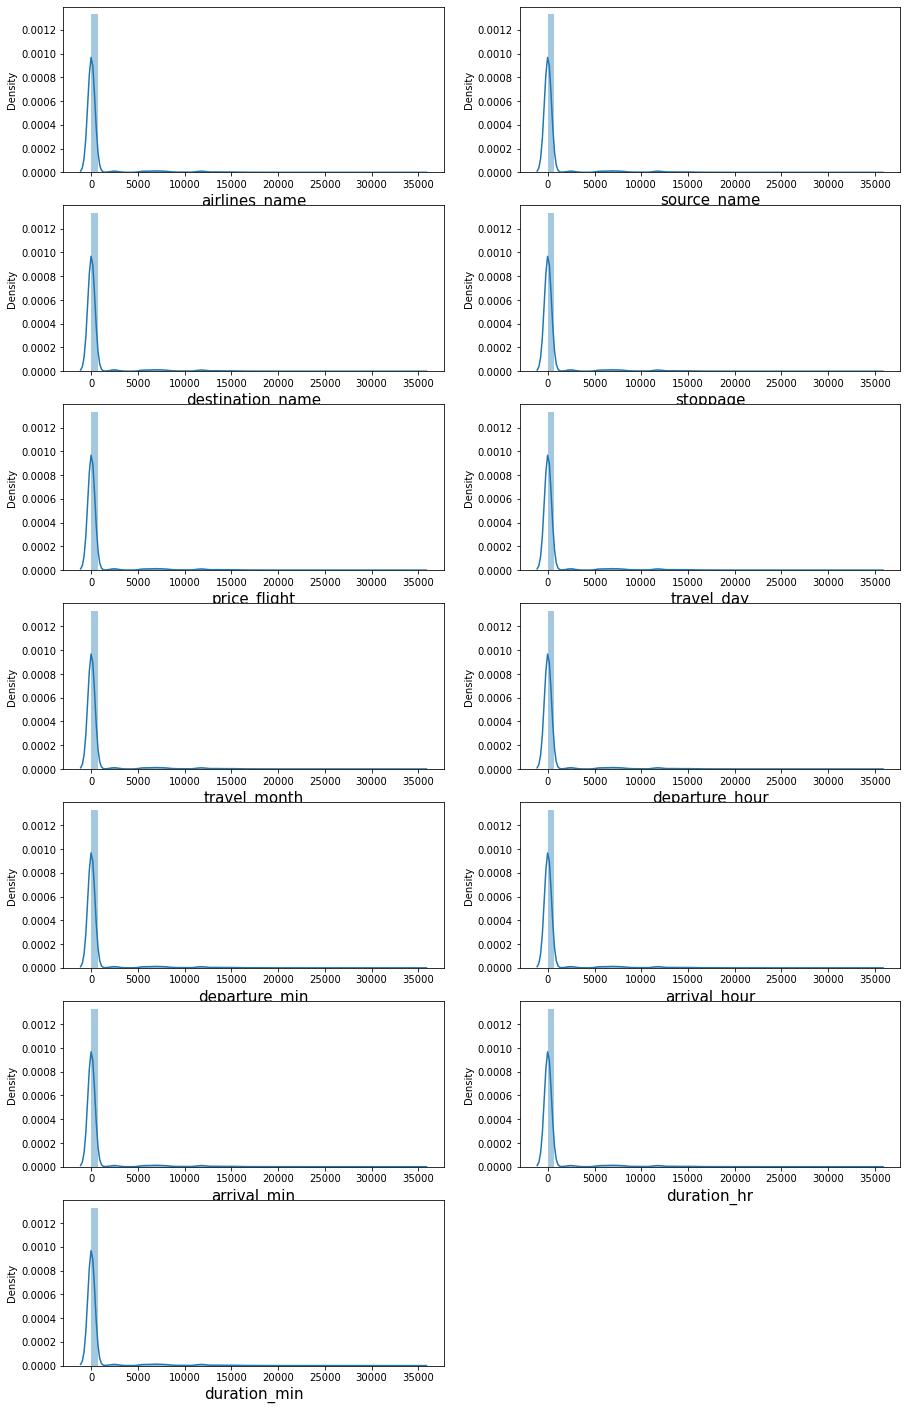

In [32]:
# data visualization 
plt.figure(figsize=(15,25))
graph=1
for column in data:
    if graph<=13:
        ax=plt.subplot(7,2,graph)
        sns.distplot(data.iloc[:,:])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

In [33]:
data.skew()

airlines_name       0.673189
source_name         0.000000
destination_name   -0.366569
stoppage            0.163027
price_flight        1.099703
travel_day         -0.041958
travel_month       -0.043275
departure_hour     -0.053562
departure_min       0.397697
arrival_hour       -0.591047
arrival_min         0.354770
duration_hr         0.580926
duration_min       -0.258189
dtype: float64

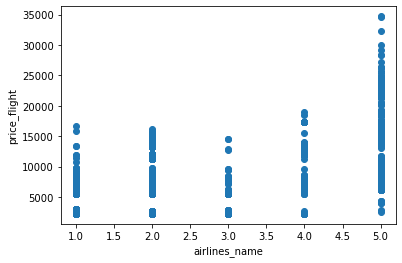

In [34]:
plt.scatter(data['airlines_name'],data['price_flight'])
plt.xlabel('airlines_name')
plt.ylabel('price_flight')
plt.show()

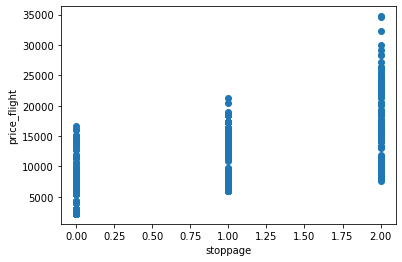

In [35]:
plt.scatter(data['stoppage'],data['price_flight'])
plt.xlabel('stoppage')
plt.ylabel('price_flight')
plt.show()

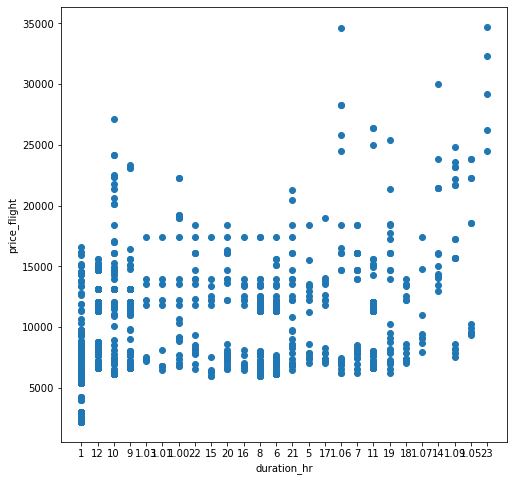

In [36]:
plt.figure(figsize=(8,8))
plt.scatter(data['duration_hr'],data['price_flight'])
plt.xlabel('duration_hr')
plt.ylabel('price_flight')
plt.show()

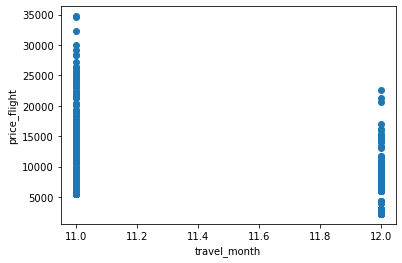

In [37]:
plt.scatter(data['travel_month'],data['price_flight'])
plt.xlabel('travel_month')
plt.ylabel('price_flight')
plt.show()

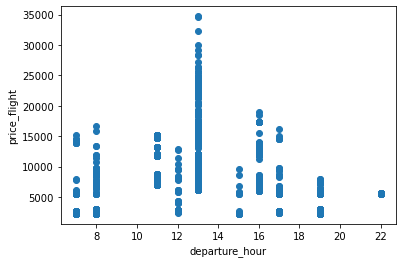

In [38]:
plt.scatter(data['departure_hour'],data['price_flight'])
plt.xlabel('departure_hour')
plt.ylabel('price_flight')
plt.show()

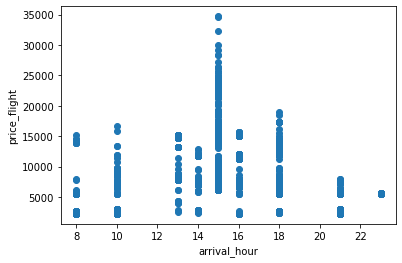

In [39]:
plt.scatter(data['arrival_hour'],data['price_flight'])
plt.xlabel('arrival_hour')
plt.ylabel('price_flight')
plt.show()

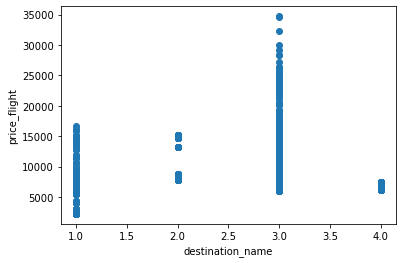

In [40]:
plt.scatter(data['destination_name'],data['price_flight'])
plt.xlabel('destination_name')
plt.ylabel('price_flight')
plt.show()

<AxesSubplot:xlabel='price_flight'>

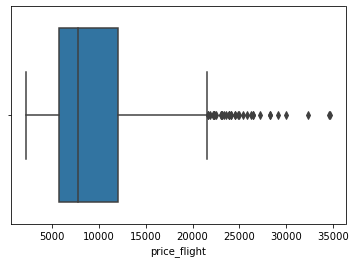

In [41]:
# data visualization
sns.boxplot(data['price_flight'])

<AxesSubplot:xlabel='airlines_name', ylabel='count'>

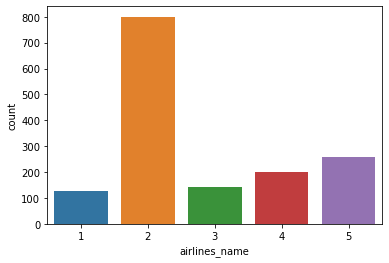

In [42]:
sns.countplot(data['airlines_name'])

<AxesSubplot:xlabel='stoppage', ylabel='count'>

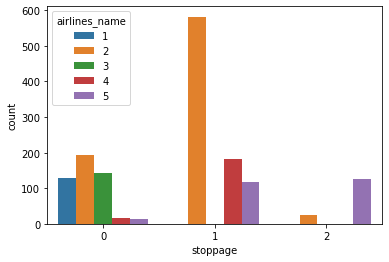

In [43]:
sns.countplot('stoppage',hue='airlines_name',data=data)

<AxesSubplot:xlabel='travel_month', ylabel='count'>

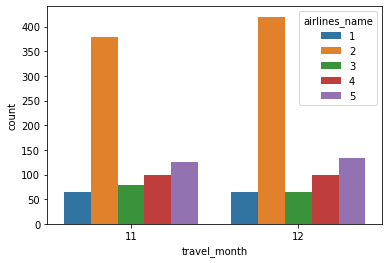

In [44]:
sns.countplot('travel_month',hue='airlines_name',data=data)

<AxesSubplot:xlabel='travel_day', ylabel='count'>

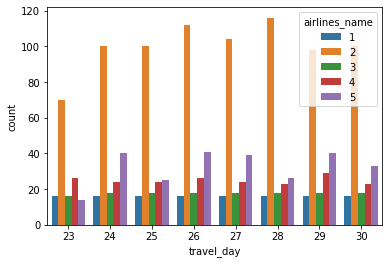

In [45]:
sns.countplot('travel_day',hue='airlines_name',data=data)

<AxesSubplot:xlabel='destination_name', ylabel='count'>

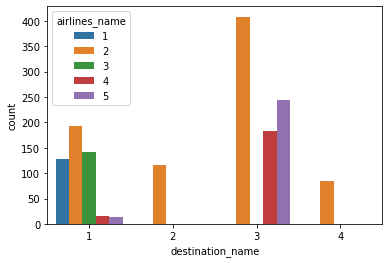

In [46]:
sns.countplot('destination_name',hue='airlines_name',data=data)

In [47]:
x=data.drop(columns=['price_flight'])
y=data['price_flight']

In [48]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [49]:
x_scaled=scaler.fit_transform(x)

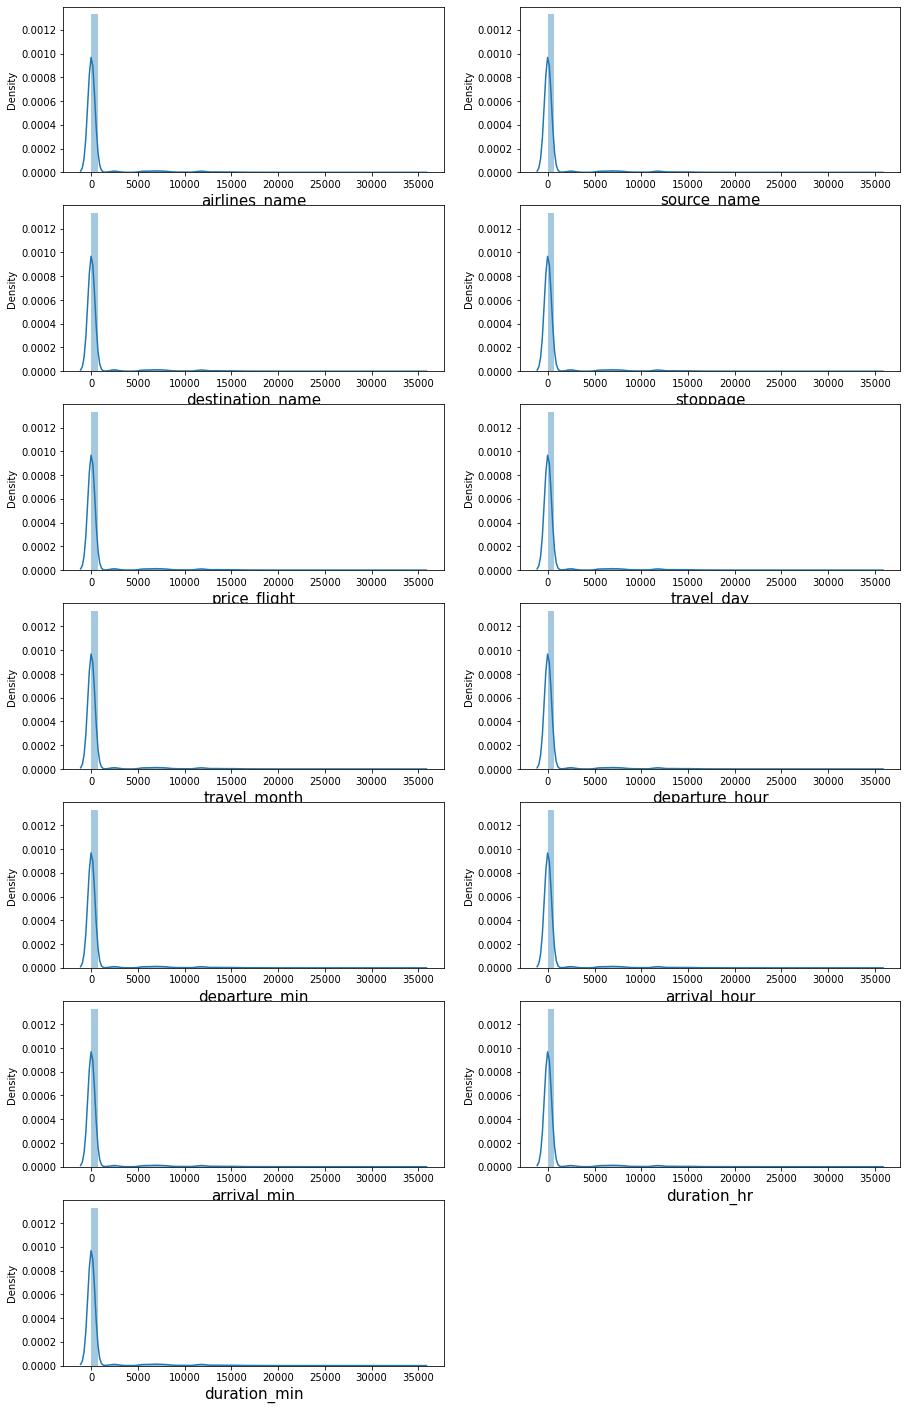

In [50]:
# data visualization after scaling of data
plt.figure(figsize=(15,25))
graph=1
for column in data:
    if graph<=13:
        ax=plt.subplot(7,2,graph)
        sns.distplot(data.iloc[:,:])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

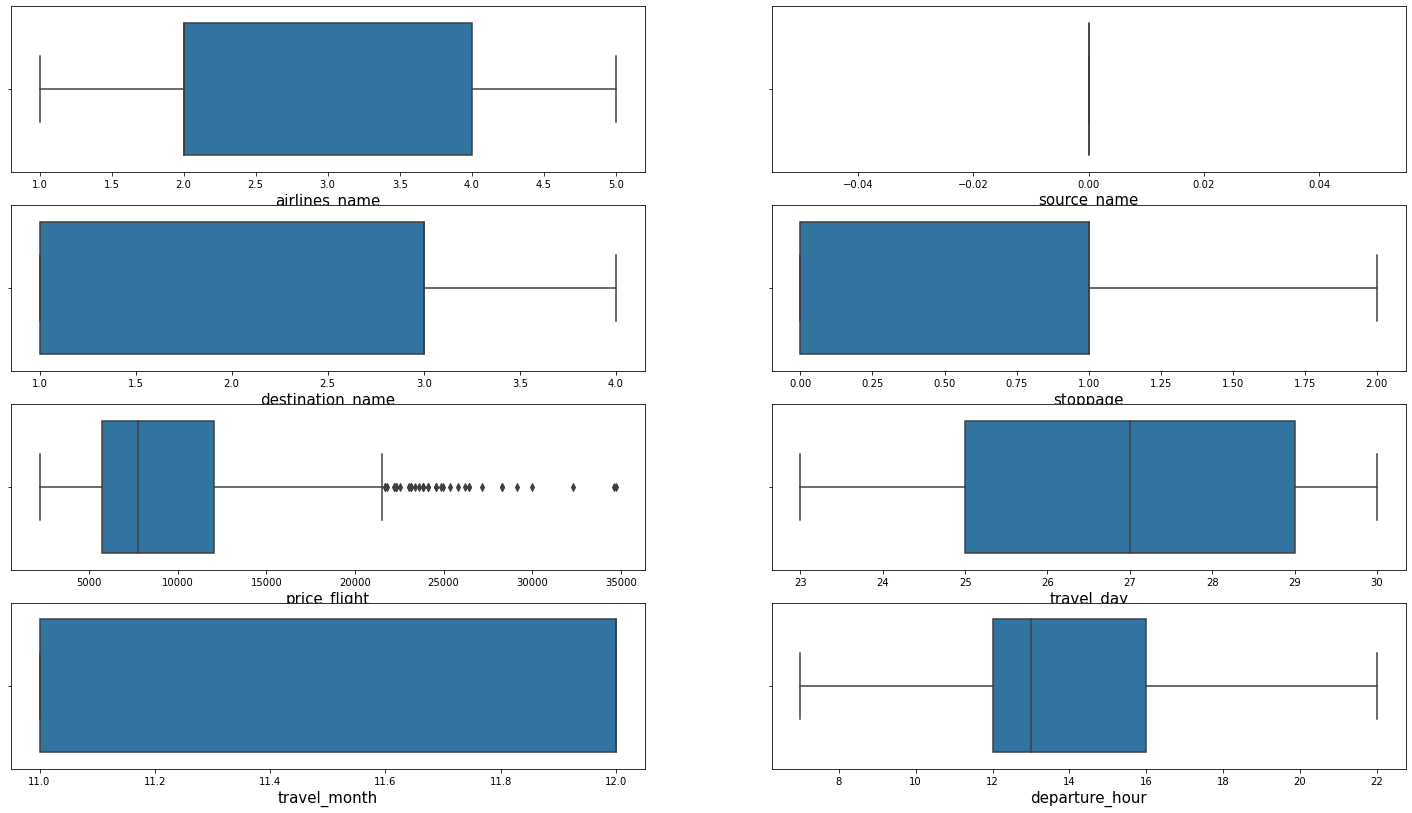

In [51]:
plt.figure(figsize=(25,25))
graph=1
for column in data:
    if graph<=8:
        ax=plt.subplot(7,2,graph)
        sns.boxplot(data[column],orient='v')
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

<AxesSubplot:xlabel='price_flight'>

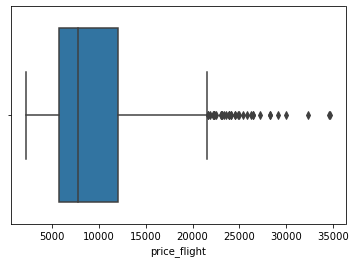

In [52]:
sns.boxplot(data['price_flight'])

In [53]:
from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(x,y)

ExtraTreesRegressor()

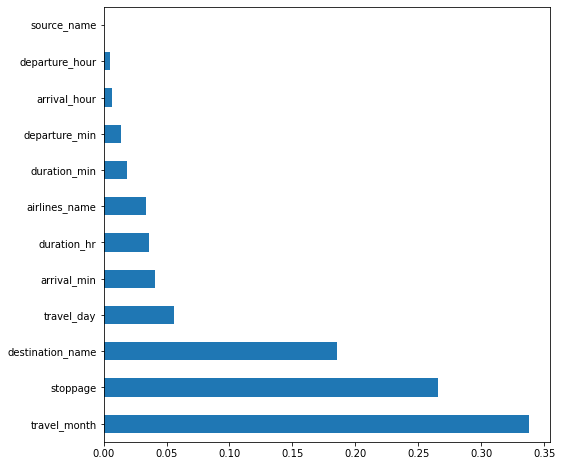

In [54]:
plt.figure(figsize=(8,8))
feat_importances=pd.Series(selection.feature_importances_,index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=55)

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
lr=LinearRegression()

In [59]:
lr.fit(x_train,y_train)

LinearRegression()

In [60]:
lr.score(x_train,y_train)

0.8279689876636299

In [61]:
lr_pred=lr.predict(x_test)

In [62]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [63]:
mean_absolute_error(y_test,lr_pred)

1394.8885618778704

In [64]:
mean_squared_error(y_test,lr_pred)

4531227.98911989

In [65]:
r2_score(y_test,lr_pred)

0.8083929139436467

In [66]:
from sklearn.model_selection import cross_val_score

In [67]:
lin_score=cross_val_score(lr,x,y,cv=5,scoring='neg_mean_absolute_error')
lr_score_n=-lin_score
np.mean(lr_score_n)

1484.4857502944494

In [68]:
lin_score=cross_val_score(lr,x,y,cv=5,scoring='neg_mean_squared_error')
lr_score_n=-lin_score
np.mean(lr_score_n)

4795558.098379803

In [69]:
lin_score=cross_val_score(lr,x,y,cv=5,scoring='r2')
lr_score_n=-lin_score
np.mean(lr_score_n)

-0.7871935477021845

In [70]:
from sklearn import linear_model
lasso_reg=linear_model.Lasso(alpha=50,max_iter=100,tol=0.1)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [71]:
lasso_reg.score(x_train,y_train)

0.8191328813918474

In [72]:
lasso_reg.score(x_test,y_test)

0.8014841332687367

In [73]:
lasso_pred=lasso_reg.predict(x_test)

In [74]:
r2_score(y_test,lasso_pred)

0.8014841332687367

In [75]:
lin_score=cross_val_score(lasso_reg,x,y,cv=5,scoring='r2')
lr_score_n=-lin_score
np.mean(lr_score_n)

-0.7787324592224018

In [76]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=50,max_iter=100,tol=0.1)
ridge_reg.fit(x_train,y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [77]:
ridge_reg.score(x_train,y_train)

0.8259206591997831

In [78]:
ridge_reg.score(x_test,y_test)

0.8059251213321297

In [79]:
ridge_pred=ridge_reg.predict(x_test)

In [80]:
r2_score(y_test,ridge_pred)

0.8059251213321297

In [81]:
lin_score=cross_val_score(ridge_reg,x,y,cv=5,scoring='r2')
lr_score_n=-lin_score
np.mean(lr_score_n)

-0.7802693412185014

In [82]:
from sklearn.neighbors import KNeighborsRegressor

In [83]:
knn=KNeighborsRegressor()

In [84]:
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [85]:
knn.score(x_train,y_train)

0.9430997244789104

In [86]:
knn.score(x_test,y_test)

0.9249234367690562

In [87]:
knn_pred=knn.predict(x_test)

In [88]:
mean_absolute_error(y_test,knn_pred)

722.3045751633988

In [89]:
mean_squared_error(y_test,knn_pred)

1775451.1674945534

In [90]:
r2_score(y_test,knn_pred)

0.9249234367690562

In [91]:
lin_score=cross_val_score(knn,x,y,cv=5,scoring='neg_mean_absolute_error')
knn_score_n=-lin_score
np.mean(knn_score_n)

2255.2044761598627

In [92]:
lin_score=cross_val_score(knn,x,y,cv=5,scoring='neg_mean_squared_error')
knn_score_n=-lin_score
np.mean(knn_score_n)

12512516.900336955

In [93]:
lin_score=cross_val_score(knn,x,y,cv=5,scoring='r2')
knn_score_n=-lin_score
np.mean(knn_score_n)

-0.4645091119343917

In [94]:
from sklearn.tree import DecisionTreeRegressor

In [95]:
dt=DecisionTreeRegressor()

In [96]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [97]:
dt.score(x_train,y_train)

0.9955060391536226

In [98]:
dt.score(x_test,y_test)

0.9441816832400951

In [99]:
dt_pred=dt.predict(x_test)

In [100]:
mean_absolute_error(y_test,dt_pred)

513.9109658678286

In [101]:
mean_squared_error(y_test,dt_pred)

1320021.7403945778

In [102]:
r2_score(y_test,dt_pred)

0.9441816832400951

In [103]:
lin_score=cross_val_score(dt,x,y,cv=5,scoring='neg_mean_absolute_error')
dt_score_n=-lin_score
np.mean(dt_score_n)

1079.0531968998894

In [104]:
lin_score=cross_val_score(dt,x,y,cv=5,scoring='neg_mean_squared_error')
dt_score_n=-lin_score
np.mean(dt_score_n)

4754799.854713425

In [105]:
lin_score=cross_val_score(dt,x,y,cv=5,scoring='r2')
dt_score_n=-lin_score
np.mean(dt_score_n)

-0.7994978435553972

In [106]:
from sklearn.ensemble import RandomForestRegressor

In [107]:
rf=RandomForestRegressor()

In [108]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [109]:
rf.score(x_train,y_train)

0.9904351494043715

In [110]:
rf.score(x_test,y_test)

0.9542422980388694

In [111]:
rf_pred=rf.predict(x_test)

In [112]:
mean_absolute_error(y_test,rf_pred)

500.1283581865967

In [113]:
mean_squared_error(y_test,rf_pred)

1082102.8810129745

In [114]:
r2_score(y_test,rf_pred)

0.9542422980388694

In [115]:
lin_score=cross_val_score(rf,x,y,cv=5,scoring='neg_mean_absolute_error')
rf_score_n=-lin_score
np.mean(rf_score_n)

932.0465701307737

In [116]:
lin_score=cross_val_score(rf,x,y,cv=5,scoring='neg_mean_squared_error')
rf_score_n=-lin_score
np.mean(rf_score_n)

2972917.965813981

In [117]:
lin_score=cross_val_score(rf,x,y,cv=5,scoring='r2')
rf_score_n=-lin_score
np.mean(rf_score_n)

-0.8709567593820319

In [118]:
from sklearn.model_selection import GridSearchCV

In [119]:
# using Hypertunning parameter
lr=LinearRegression()

params=({'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]})
grd=GridSearchCV(lr,param_grid=params,cv=5,n_jobs=-1)
grd.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [120]:
best_parameters=grd.best_params_
print(best_parameters)

{'copy_X': True, 'fit_intercept': True, 'normalize': False}


In [121]:
grd.best_score_

0.821063102315893

In [122]:
# from above conclusion it shows that Linear Regression is the best machine learning algorithm.